In [2]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics

import torch
import torchvision.transforms as transforms
import torchvision.models
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data import WeightedRandomSampler
import time
import torchstain

import data_reader
import dataset
from plots import learning_curve_train

import cv2

In [3]:
DATA_SET_NAME = f"data_set_x20_100%_SPLIT"

In [4]:
n_splits = 1
X, Y, patch_ids = [], [], []

for SPLIT in range(n_splits):
    if SPLIT == n_splits-1: # For the final split for validation we take the firs one for test
        SPLIT_NAME = DATA_SET_NAME + f"{0}"
    else:
        SPLIT_NAME = DATA_SET_NAME + f"{SPLIT+1}" # Test set

    print("Reading split: ", SPLIT_NAME)
    x, y, _ , case_id = data_reader.read_lmdb(f"D:\data\WSI\patches\{SPLIT_NAME}")

    X.extend(x)
    Y.extend(y)
    patch_ids.extend(case_id)

Reading split:  data_set_x20_100%_SPLIT0
Read lmdb
8209


In [5]:
print(patch_ids[10])
print(patch_ids[6440])

X_TCGA-FB-AAPS-01Z_10
X_GTEX-1QW4Y-0925_6440


In [9]:


X_gtex, X_tcga = [], []


for x, y, patch_id in zip(X,Y,patch_ids):
    if "GTEX" in patch_id:
        X_gtex.append(torch.tensor(x))
    elif "TCGA" in patch_id:
        X_tcga.append(x)

X_gtex = np.array(torch.cat(X_gtex[:800]))

target = X_gtex
to_transform = X_tcga[0]


T = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*255)
])

torch_normalizer = torchstain.normalizers.MacenkoNormalizer(backend='torch')
torch_normalizer.fit(T(target))

t_to_transform = T(to_transform)
norm, H, E = torch_normalizer.normalize(I=t_to_transform, stains=True)

tensor([[[239., 239., 239.,  ..., 239., 239., 239.],
         [239., 239., 239.,  ..., 239., 239., 239.],
         [239., 239., 239.,  ..., 239., 239., 239.],
         ...,
         [236., 223., 209.,  ..., 197., 204., 197.],
         [228., 213., 226.,  ..., 193., 196., 181.],
         [212., 207., 238.,  ..., 196., 202., 186.]],

        [[233., 233., 233.,  ..., 236., 236., 236.],
         [233., 233., 233.,  ..., 236., 236., 236.],
         [233., 233., 233.,  ..., 236., 236., 236.],
         ...,
         [179., 150., 128.,  ..., 132., 147., 148.],
         [167., 140., 151.,  ..., 131., 142., 136.],
         [146., 145., 178.,  ..., 124., 132., 122.]],

        [[236., 236., 236.,  ..., 239., 239., 239.],
         [236., 236., 236.,  ..., 239., 239., 239.],
         [236., 236., 236.,  ..., 239., 239., 239.],
         ...,
         [199., 186., 173.,  ..., 174., 182., 191.],
         [193., 179., 182.,  ..., 174., 182., 185.],
         [183., 180., 193.,  ..., 171., 173., 168.]]]

In [12]:

print(X_gtex.shape)

torch.Size([3, 512, 512])


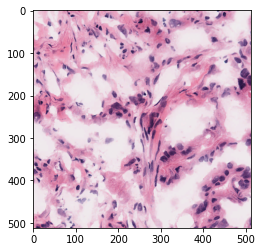

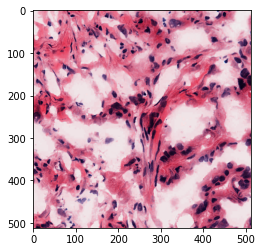

In [8]:

#plt.imshow(target)
#plt.show()
plt.imshow(to_transform)
plt.show()
plt.imshow(norm)
plt.show()

In [6]:
from normalization import normalize_staining
import data_reader

In [7]:
DATA_SET_NAME = f"data_set_x20_100%_SPLIT"

In [8]:
n_splits = 1
X, Y, patch_ids = [], [], []

for SPLIT in range(n_splits):
    if SPLIT == n_splits-1: # For the final split for validation we take the firs one for test
        SPLIT_NAME = DATA_SET_NAME + f"{0}"
    else:
        SPLIT_NAME = DATA_SET_NAME + f"{SPLIT+1}" # Test set

    print("Reading split: ", SPLIT_NAME)
    x, y, _ , case_id = data_reader.read_lmdb(f"D:\data\WSI\patches\{SPLIT_NAME}")

    X.extend(x)
    Y.extend(y)
    patch_ids.extend(case_id)

Reading split:  data_set_x20_100%_SPLIT0
Read lmdb
8209


In [11]:
import matplotlib.pyplot as plt

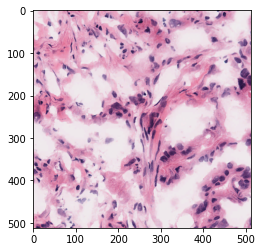

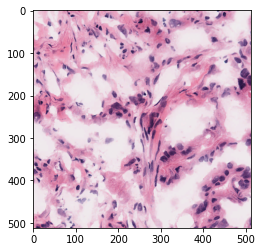

In [12]:
plt.imshow(X[0])
plt.show()

normalize_staining(X[0])

plt.imshow(X[0])
plt.show()